In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
df = pd.read_csv('/content/Fertilizer Prediction.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.shape

(99, 9)

In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [ ]:
d1 = {
    'Sandy':1, 'Loamy':2, 'Black':3, 'Red':4, 'Clayey':5
}

d2 = {
    'Maize':1, 'Sugarcane':2, 'Cotton':3, 'Tobacco':4, 'Paddy':5, 'Barley':6,
       'Wheat':7, 'Millets':8, 'Oil seeds':9, 'Pulses':10, 'Ground Nuts':11
}

df['Soil Type'] = df['Soil Type'].map(d1)
df['Crop Type'] = df['Crop Type'].map(d2)
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,1,1,37,0,0,Urea
1,29,52,45,2,2,12,0,36,DAP
2,34,65,62,3,3,7,9,30,14-35-14
3,32,62,34,4,4,22,0,20,28-28
4,28,54,46,5,5,35,0,0,Urea


In [ ]:
x = df.drop('Fertilizer Name',axis=1)
y = df['Fertilizer Name']

In [ ]:
scaler = StandardScaler()
scaling = scaler.fit_transform(x)
scaling

In [ ]:
x = pd.DataFrame(scaling,columns=x.columns)
x.head()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


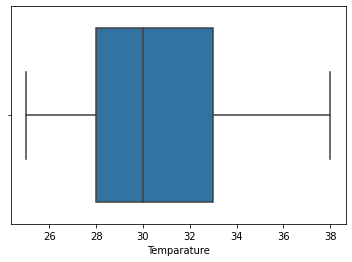

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


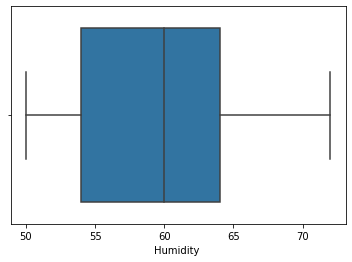

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


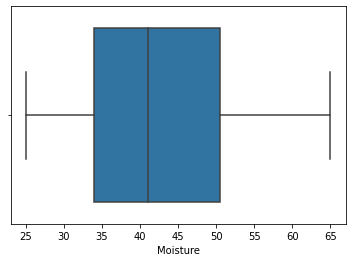

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


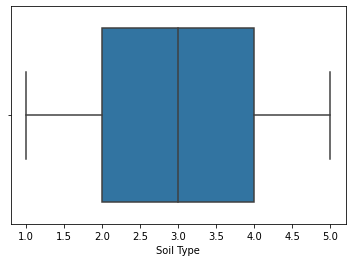

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


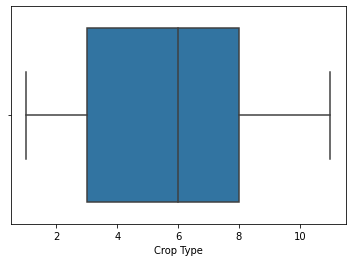

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


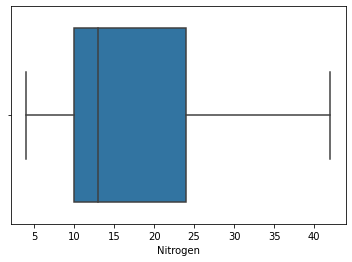

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


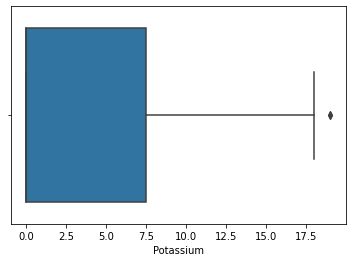

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


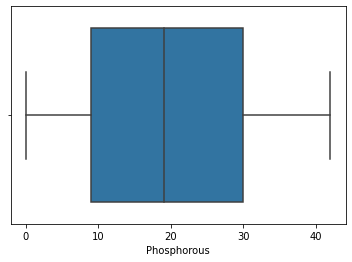

In [ ]:
for i in x.columns:
  sns.boxplot(x[i])
  plt.show()

In [ ]:
## outlier detection
for i in x.columns:
  q1 = np.percentile(x[i],25)
  q3 = np.percentile(x[i],75)
  iqr = q3-q1
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)

  x[i] = np.where(x[i]>upper_bound,upper_bound,x[i])
  x[i] = np.where(x[i]<lower_bound,lower_bound,x[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


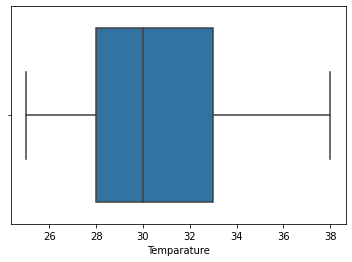

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


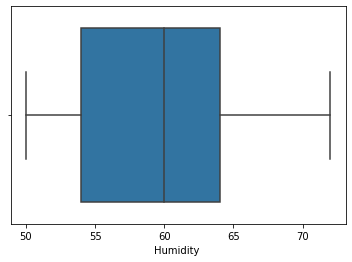

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


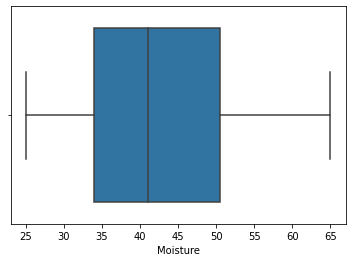

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


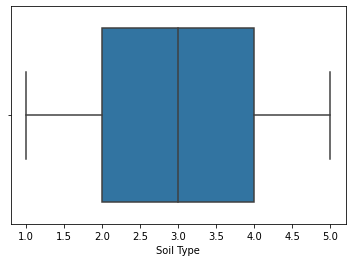

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


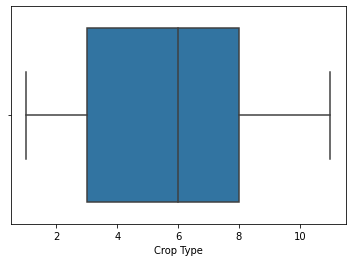

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


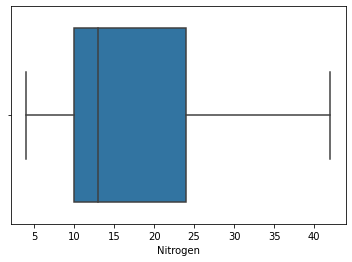

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


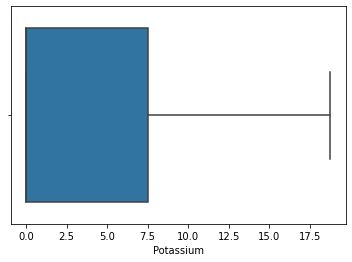

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


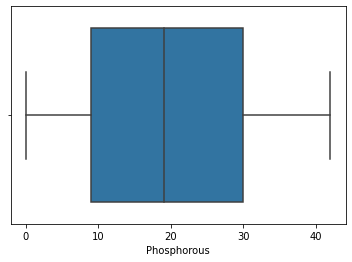

In [ ]:
for i in x.columns:
  sns.boxplot(x[i])
  plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=42)

In [ ]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()
model4 = SVC()
model5 = XGBClassifier()

In [ ]:
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.95


In [ ]:
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred))

1.0


In [ ]:
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
print(accuracy_score(y_test,pred))

0.9


In [ ]:
model4.fit(x_train,y_train)
pred = model4.predict(x_test)
print(accuracy_score(y_test,pred))

0.9


In [ ]:
model5.fit(x_train,y_train)
pred = model5.predict(x_test)
print(accuracy_score(y_test,pred))

1.0


In [ ]:
## we will select random forest model
model2.predict([[-1.229084,-1.230737,-0.462064,-1.393052,-1.562929,1.567539,-0.584910,-1.387607]])

array(['20-20'], dtype=object)

In [ ]:
import pickle
pickle.dump(model2,open('fertilizer_recommendation.pkl','wb'))